In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import sparse
import time
import pandas as pd
import gudhi as gd

import ripser
from ripser import ripser
from persim import plot_diagrams
from gudhi import AlphaComplex

In [2]:
lt=pd.read_csv('scaled_polio.csv')
#lt=lt[lt.Year==2022]

#lt.dropna(inplace=True)
lt.isnull().sum()

ParentLocation    0
Location          0
Value             0
Latitude          0
Longitude         0
LifeExpect        0
GDP               0
MedianAge         0
dtype: int64

In [3]:
grouped = lt.groupby('ParentLocation')
countries={}
for location, group in grouped:
    group[['Value','Latitude','Longitude']]=group[['Value','Latitude','Longitude']].apply(pd.to_numeric)
    group['Point'] = list(zip(group['Value'],group['Latitude'],group['Longitude']))
    pts=group['Point']
#ptz=[list(point) for point in pts]
#ptz
#ptp=np.array(ptz).astype(float)
    points=np.array(pts)
    countries[location]=points

In [4]:
np.unique(lt.ParentLocation)

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

In [14]:
#turning the lat long points into useable format for the alphacomplex

lt[['Value','Latitude','Longitude']]=lt[['Value','Latitude','Longitude']].apply(pd.to_numeric)
lt['Point'] = list(zip(lt['Value'],lt['Latitude'],lt['Longitude']))
ptz=lt['Point']
pointz=np.array(ptz)
#pointz

4749  simplices -  193  vertices.
Alpha complex is of dimension  3  -  None


<function matplotlib.pyplot.show(close=None, block=None)>

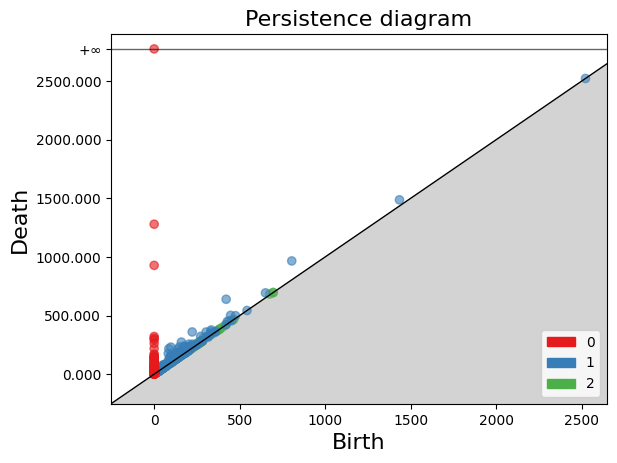

In [12]:
#creating simplex tree and then alpha complex, resulting in persistence diagram
world= AlphaComplex(pointz)

stree= world.create_simplex_tree()
print('Alpha complex is of dimension ', stree.dimension(), ' - ',
    stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    (fmt % tuple(filtered_value))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.show

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[22, 23] -> 1.57
[23, 27] -> 2.17
[6, 8] -> 2.31
[31, 34] -> 2.38
[24, 29] -> 3.67
[22, 31] -> 5.27
[8, 9] -> 5.59
[6, 9] -> 6.55
[6, 8, 9] -> 6.78
[11, 16] -> 9.64
[16, 23] -> 9.78
[23, 31] -> 11.07
[22, 23, 31] -> 11.07
[16, 22] -> 11.13
[16, 22, 23] -> 11.13
[9, 15] -> 11.42
[27, 31] -> 12.31
[23, 27, 31] -> 12.31
[27, 32] -> 12.46
[26, 33] -> 12.78
[5, 11] -> 13.09
[22, 27] -> 14.37
[22, 23, 27] -> 14.37
[22, 27, 31] -> 14.37
[22, 23, 27, 31] -> 14.37
[8, 15] -> 17.01
[8, 9, 15] -> 17.01
[19, 24] -> 17.43
[27, 34] -> 17.77
[27, 31, 34] -> 17.77


<function matplotlib.pyplot.show(close=None, block=None)>

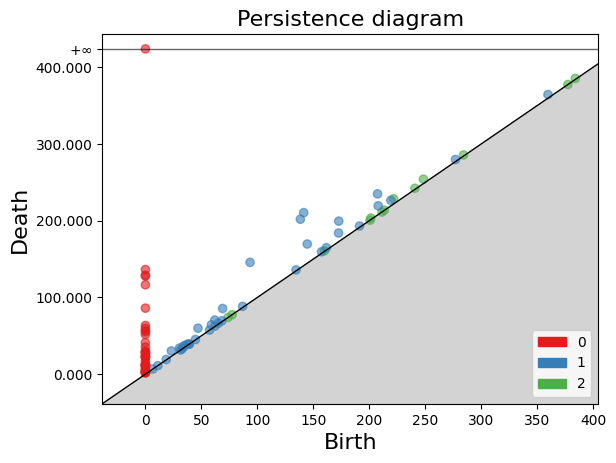

In [13]:
#creating simplex tree and then alpha complex, resulting in persistence diagram for just america
amac= AlphaComplex(countries['Americas'])

stree= amac.create_simplex_tree()
#print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')


fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    print(fmt % tuple(filtered_value))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.show

Alpha complex is of dimension  3  -  925  simplices -  47  vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[21, 22] -> 0.52
[33, 36] -> 4.43
[6, 10] -> 5.92
[2, 3] -> 7.67
[34, 37] -> 7.70
[6, 9] -> 7.99
[9, 10] -> 8.13
[6, 9, 10] -> 9.87
[2, 5] -> 10.63
[28, 34] -> 11.91
[20, 22] -> 12.01
[31, 38] -> 12.47
[29, 32] -> 12.48
[37, 46] -> 12.79
[25, 29] -> 12.79
[32, 37] -> 13.22
[29, 35] -> 13.35
[25, 35] -> 14.07
[43, 44] -> 14.71
[9

<function matplotlib.pyplot.show(close=None, block=None)>

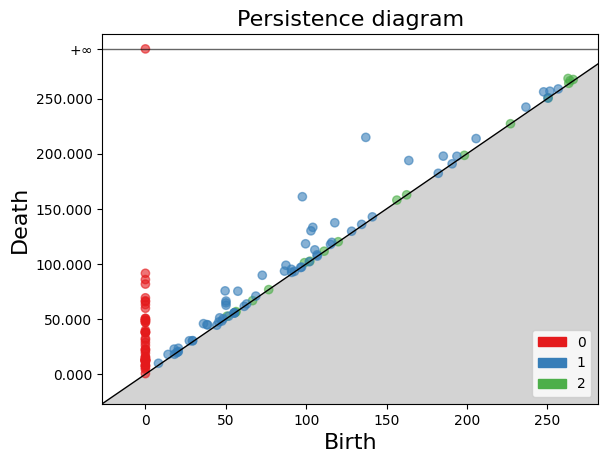

In [23]:
#creating simplex tree and then alpha complex, resulting in persistence diagram for africa
afac= AlphaComplex(countries['Africa'])

stree= afac.create_simplex_tree()
print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
for filtered_value in stree.get_filtration():
    print(fmt % tuple(filtered_value))

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    (fmt % tuple(filtered_value))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.show

/scratch/ks3538/conda/envs/tda/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<function matplotlib.pyplot.show(close=None, block=None)>

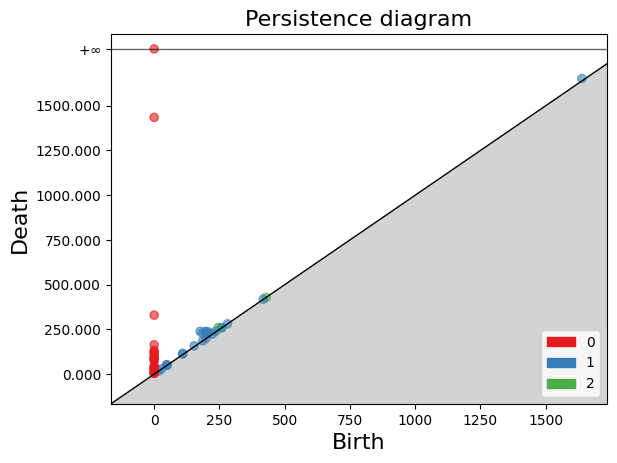

In [12]:
#creating simplex tree and then alpha complex, resulting in persistence diagram for the eastern mediterranean
emac= AlphaComplex(countries['Eastern Mediterranean'])

stree= emac.create_simplex_tree()
#print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    (fmt % tuple(filtered_value))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.show

In [11]:
countries['Eastern Mediterranean']

array([(47, 8.3676771, 49.083416), (48, 34.6401861, 39.0494106),
       (59, 11.8145966, 42.8453061), (64, 40.375713, -76.4626118),
       (68, 16.3471243, 47.8915271), (73, 26.8234472, 18.1236723),
       (76, 33.7680065, 66.2385139), (76, 32.3635964, 35.561242),
       (85, 30.3308401, 71.247499), (85, 10.9, 6.5),
       (92, 33.0955793, 44.1749775), (95, 29.3796532, 47.9734174),
       (95, 24.0002488, 53.9994829), (97, 26.0280409, 50.55316820508136),
       (97, 35.8681298, -90.9456751), (97, 42.2679001, 26.9246399),
       (97, 36.8002068, 10.1857757), (98, 25.6242618, 42.3528328),
       (99, 36.2619477, 59.6051728),
       (99, 28.3347722, -10.371337908392649),
       (99, 39.1074426, 47.5061085)], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

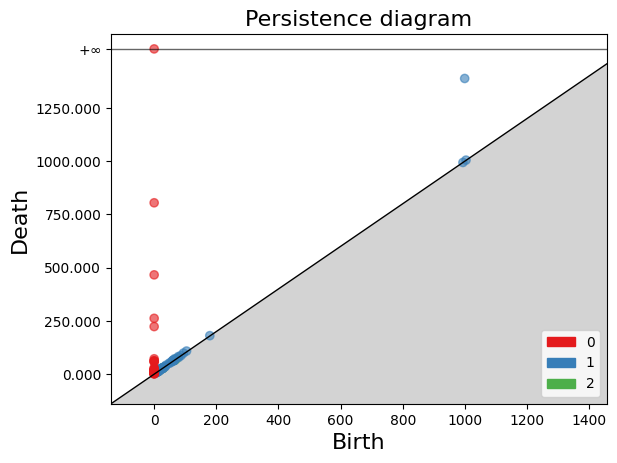

In [13]:
#creating simplex tree and then alpha complex, resulting in persistence diagram for Europe
eac= AlphaComplex(countries['Europe'])

stree= eac.create_simplex_tree()
#print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    (fmt % tuple(filtered_value))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

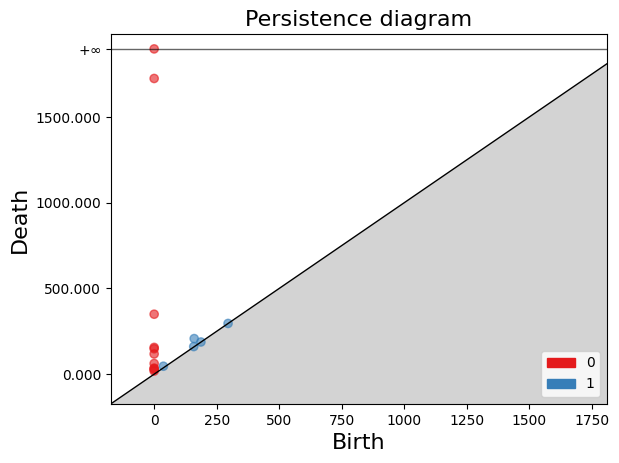

In [14]:
#creating simplex tree and then alpha complex, resulting in persistence diagram for south east asia
seaac= AlphaComplex(countries['South-East Asia'])

stree= seaac.create_simplex_tree()
#print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    (fmt % tuple(filtered_value))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

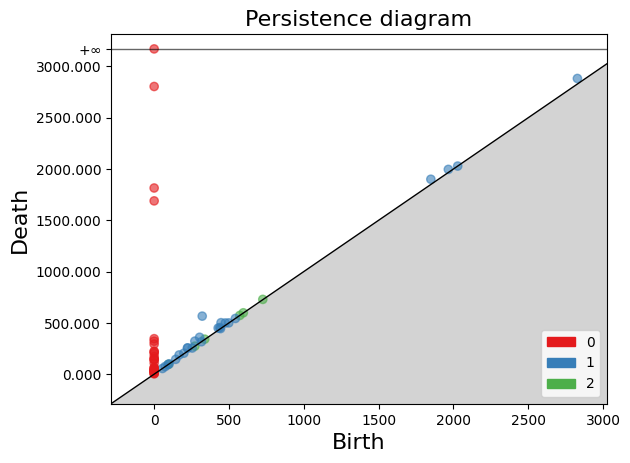

In [15]:
#creating simplex tree and then alpha complex, resulting in persistence diagram for the western pacific
wpac= AlphaComplex(countries['Western Pacific'])

stree= wpac.create_simplex_tree()
#print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    (fmt % tuple(filtered_value))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.show

In [3]:
#Alpha complex containing all factors
lt[['LifeExpect','GDP','MedianAge','Latitude','Longitude']]=lt[['LifeExpect','GDP','MedianAge','Latitude','Longitude']].apply(pd.to_numeric)
lt['all']=list(zip(lt['LifeExpect'],lt['GDP'],lt['MedianAge'],lt['Latitude'],lt['Longitude']))
e=lt['all']
ee=np.array(e)

<function matplotlib.pyplot.show(close=None, block=None)>

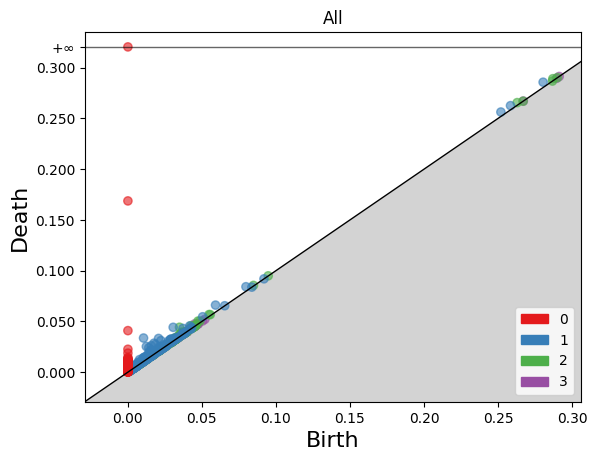

In [5]:
#all
alll = AlphaComplex(ee)

stree = alll.create_simplex_tree()
#print('Weighted alpha complex is of dimension ', stree.dimension(), ' - ',
      #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
fmt = '%s -> %.2f'
#for simplex in stree.get_simplices():
    #print(fmt % tuple(simplex))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
#plt.xlim([-1.05,-.65])
#plt.ylim([-1.05,-.65])
plt.title('All')
plt.savefig('allnoweight.png')
plt.show